In [1]:
!pip install neurolab

Defaulting to user installation because normal site-packages is not writeable


In [3]:
import numpy as np
import neurolab as nl
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [4]:
data = pd.read_csv('Pistachio_16_Features_Dataset.csv')
data

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,ROUNDNESS,COMPACTNESS,SHAPEFACTOR_1,SHAPEFACTOR_2,SHAPEFACTOR_3,SHAPEFACTOR_4,Class
0,63391,1568.4050,390.3396,236.7461,0.7951,284.0984,0.8665,73160.0,0.6394,1.6488,0.3238,0.7278,0.0062,0.0037,0.5297,0.8734,Kirmizi_Pistachio
1,68358,1942.1870,410.8594,234.7525,0.8207,295.0188,0.8765,77991.0,0.6772,1.7502,0.2277,0.7181,0.0060,0.0034,0.5156,0.9024,Kirmizi_Pistachio
2,73589,1246.5380,452.3630,220.5547,0.8731,306.0987,0.9172,80234.0,0.7127,2.0510,0.5951,0.6767,0.0061,0.0030,0.4579,0.9391,Kirmizi_Pistachio
3,71106,1445.2610,429.5291,216.0765,0.8643,300.8903,0.9589,74153.0,0.7028,1.9879,0.4278,0.7005,0.0060,0.0030,0.4907,0.9755,Kirmizi_Pistachio
4,80087,1251.5240,469.3783,220.9344,0.8823,319.3273,0.9657,82929.0,0.7459,2.1245,0.6425,0.6803,0.0059,0.0028,0.4628,0.9833,Kirmizi_Pistachio
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2144,85691,2327.3459,439.8794,278.9297,0.7732,330.3107,0.8886,96439.0,0.6590,1.5770,0.1988,0.7509,0.0051,0.0033,0.5639,0.8892,Siit_Pistachio
2145,101136,1255.6190,475.2161,271.3299,0.8210,358.8459,0.9888,102286.0,0.7584,1.7514,0.8061,0.7551,0.0047,0.0027,0.5702,0.9987,Siit_Pistachio
2146,97409,1195.2150,452.1823,274.5764,0.7945,352.1718,0.9902,98376.0,0.7635,1.6468,0.8569,0.7788,0.0046,0.0028,0.6066,0.9989,Siit_Pistachio
2147,78466,2356.9080,445.9131,258.5125,0.8148,316.0791,0.8662,90591.0,0.6123,1.7249,0.1775,0.7088,0.0057,0.0033,0.5024,0.8667,Siit_Pistachio


In [5]:
data=data.dropna()
data

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,ROUNDNESS,COMPACTNESS,SHAPEFACTOR_1,SHAPEFACTOR_2,SHAPEFACTOR_3,SHAPEFACTOR_4,Class
0,63391,1568.4050,390.3396,236.7461,0.7951,284.0984,0.8665,73160.0,0.6394,1.6488,0.3238,0.7278,0.0062,0.0037,0.5297,0.8734,Kirmizi_Pistachio
1,68358,1942.1870,410.8594,234.7525,0.8207,295.0188,0.8765,77991.0,0.6772,1.7502,0.2277,0.7181,0.0060,0.0034,0.5156,0.9024,Kirmizi_Pistachio
2,73589,1246.5380,452.3630,220.5547,0.8731,306.0987,0.9172,80234.0,0.7127,2.0510,0.5951,0.6767,0.0061,0.0030,0.4579,0.9391,Kirmizi_Pistachio
3,71106,1445.2610,429.5291,216.0765,0.8643,300.8903,0.9589,74153.0,0.7028,1.9879,0.4278,0.7005,0.0060,0.0030,0.4907,0.9755,Kirmizi_Pistachio
4,80087,1251.5240,469.3783,220.9344,0.8823,319.3273,0.9657,82929.0,0.7459,2.1245,0.6425,0.6803,0.0059,0.0028,0.4628,0.9833,Kirmizi_Pistachio
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2143,85983,1157.1160,444.3447,248.8627,0.8284,330.8730,0.9823,87536.0,0.6799,1.7855,0.8070,0.7446,0.0052,0.0029,0.5545,0.9900,Siit_Pistachio
2144,85691,2327.3459,439.8794,278.9297,0.7732,330.3107,0.8886,96439.0,0.6590,1.5770,0.1988,0.7509,0.0051,0.0033,0.5639,0.8892,Siit_Pistachio
2145,101136,1255.6190,475.2161,271.3299,0.8210,358.8459,0.9888,102286.0,0.7584,1.7514,0.8061,0.7551,0.0047,0.0027,0.5702,0.9987,Siit_Pistachio
2146,97409,1195.2150,452.1823,274.5764,0.7945,352.1718,0.9902,98376.0,0.7635,1.6468,0.8569,0.7788,0.0046,0.0028,0.6066,0.9989,Siit_Pistachio


In [6]:
from sklearn.preprocessing import LabelEncoder
lc=LabelEncoder()
data['Class']=lc.fit_transform(data['Class'])
data

C:\Users\dllab.DLL-038\AppData\Local\Temp\ipykernel_7016\3745205271.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Class']=lc.fit_transform(data['Class'])


,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,ROUNDNESS,COMPACTNESS,SHAPEFACTOR_1,SHAPEFACTOR_2,SHAPEFACTOR_3,SHAPEFACTOR_4,Class
0,63391,1568.4050,390.3396,236.7461,0.7951,284.0984,0.8665,73160.0,0.6394,1.6488,0.3238,0.7278,0.0062,0.0037,0.5297,0.8734,0
1,68358,1942.1870,410.8594,234.7525,0.8207,295.0188,0.8765,77991.0,0.6772,1.7502,0.2277,0.7181,0.0060,0.0034,0.5156,0.9024,0
2,73589,1246.5380,452.3630,220.5547,0.8731,306.0987,0.9172,80234.0,0.7127,2.0510,0.5951,0.6767,0.0061,0.0030,0.4579,0.9391,0
3,71106,1445.2610,429.5291,216.0765,0.8643,300.8903,0.9589,74153.0,0.7028,1.9879,0.4278,0.7005,0.0060,0.0030,0.4907,0.9755,0
4,80087,1251.5240,469.3783,220.9344,0.8823,319.3273,0.9657,82929.0,0.7459,2.1245,0.6425,0.6803,0.0059,0.0028,0.4628,0.9833,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2143,85983,1157.1160,444.3447,248.8627,0.8284,330.8730,0.9823,87536.0,0.6799,1.7855,0.8070,0.7446,0.0052,0.0029,0.5545,0.9900,1
2144,85691,2327.3459,439.8794,278.9297,0.7732,330.3107,0.8886,96439.0,0.6590,1.5770,0.1988,0.7509,0.0051,0.0033,0.5639,0.8892,1
2145,101136,1255.6190,475.2161,271.3299,0.8210,358.8459,0.9888,102286.0,0.7584,1.7514,0.8061,0.7551,0.0047,0.0027,0.5702,0.9987,1
2146,97409,1195.2150,452.1823,274.5764,0.7945,352.1718,0.9902,98376.0,0.7635,1.6468,0.8569,0.7788,0.0046,0.0028,0.6066,0.9989,1


In [7]:
X = data.drop(data.columns[-1], axis=1).values
y = data[data.columns[16:17]].values

In [8]:
X

array([['63391', 1568.405, 390.3396, ..., 0.0037, 0.5297, 0.8734],
       ['68358', 1942.187, 410.8594, ..., 0.0034, 0.5156, 0.9024],
       ['73589', 1246.538, 452.363, ..., 0.003, 0.4579, 0.9391],
       ...,
       ['101136', 1255.619, 475.2161, ..., 0.0027, 0.5702, 0.9987],
       ['97409', 1195.215, 452.1823, ..., 0.0028, 0.6066, 0.9989],
       ['78466', 2356.908, 445.9131, ..., 0.0033, 0.5024, 0.8667]],
      dtype=object)

In [9]:
y

array([[0],
       [0],
       [0],
       ...,
       [1],
       [1],
       [1]])

In [10]:
#scaler = MinMaxScaler()
#X = scaler.fit_transform(X)

In [11]:
X

array([['63391', 1568.405, 390.3396, ..., 0.0037, 0.5297, 0.8734],
       ['68358', 1942.187, 410.8594, ..., 0.0034, 0.5156, 0.9024],
       ['73589', 1246.538, 452.363, ..., 0.003, 0.4579, 0.9391],
       ...,
       ['101136', 1255.619, 475.2161, ..., 0.0027, 0.5702, 0.9987],
       ['97409', 1195.215, 452.1823, ..., 0.0028, 0.6066, 0.9989],
       ['78466', 2356.908, 445.9131, ..., 0.0033, 0.5024, 0.8667]],
      dtype=object)

In [12]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)
print(X_train.shape)
print(X_test.shape)

(1503, 16)
(645, 16)


In [13]:
input_size = X_train.shape[1]
output_size = y_train.shape[1]

In [14]:
input_size

16

In [15]:
output_size

1

In [16]:
min_val=[]
max_val=[]

In [17]:
column=data.columns
for i in range(len(column)):
    min_val.append(min(data[column[i]].tolist()))
    max_val.append(max(data[column[i]].tolist()))
inp=list(zip(min_val,max_val))
print(inp)

[('100078', '99962'), (858.363, 2755.0491), (320.3445, 541.9661), (133.5096, 383.0461), (0.5049, 0.946), (194.8146, 397.3561), (0.588, 0.9951), (37935.0, 132478.0), (0.4272, 0.8204), (1.1585, 3.0858), (0.0628, 0.9336), (0.476, 0.8779), (0.004, 0.0131), (0.0024, 0.0053), (0.2266, 0.7706), (0.6204, 0.999), (0, 1)]


In [18]:
input_size=[]
for i in inp:
    input_size.append(list(i))
input_size=input_size[:-1]
print(input_size)

[['100078', '99962'], [858.363, 2755.0491], [320.3445, 541.9661], [133.5096, 383.0461], [0.5049, 0.946], [194.8146, 397.3561], [0.588, 0.9951], [37935.0, 132478.0], [0.4272, 0.8204], [1.1585, 3.0858], [0.0628, 0.9336], [0.476, 0.8779], [0.004, 0.0131], [0.0024, 0.0053], [0.2266, 0.7706], [0.6204, 0.999]]


In [19]:
model = nl.net.newp(input_size,1)

In [20]:
model1 = nl.net.newff(input_size,[16,1])

In [21]:
model.trainf = nl.train.train_rprop

In [22]:
model1.trainf = nl.train.train_rprop

In [23]:
error=[]
error1=[]

In [24]:
error.append(model.train(X_train,y_train,epochs=100,show=2))

Epoch: 2; Error: 321.5;
Epoch: 4; Error: 321.5;
Epoch: 6; Error: 321.5;
Epoch: 8; Error: 321.5;
Epoch: 10; Error: 321.5;
Epoch: 12; Error: 321.5;
Epoch: 14; Error: 321.5;
Epoch: 16; Error: 321.5;
Epoch: 18; Error: 321.5;
Epoch: 20; Error: 321.5;
Epoch: 22; Error: 321.5;
Epoch: 24; Error: 321.5;
Epoch: 26; Error: 321.5;
Epoch: 28; Error: 321.5;
Epoch: 30; Error: 321.5;
Epoch: 32; Error: 321.5;
Epoch: 34; Error: 321.5;
Epoch: 36; Error: 321.5;
Epoch: 38; Error: 321.5;
Epoch: 40; Error: 321.5;
Epoch: 42; Error: 321.5;
Epoch: 44; Error: 321.5;
Epoch: 46; Error: 321.5;
Epoch: 48; Error: 321.5;
Epoch: 50; Error: 321.5;
Epoch: 52; Error: 321.5;
Epoch: 54; Error: 321.5;
Epoch: 56; Error: 321.5;
Epoch: 58; Error: 321.5;
Epoch: 60; Error: 321.5;
Epoch: 62; Error: 321.5;
Epoch: 64; Error: 321.5;
Epoch: 66; Error: 321.5;
Epoch: 68; Error: 321.5;
Epoch: 70; Error: 321.5;
Epoch: 72; Error: 321.5;
Epoch: 74; Error: 321.5;
Epoch: 76; Error: 321.5;
Epoch: 78; Error: 321.5;
Epoch: 80; Error: 321.5;
Epoc

In [25]:
X_train

array([['81267', 1095.214, 427.2219, ..., 0.003, 0.5669, 0.9897],
       ['50502', 902.946, 332.1136, ..., 0.0041, 0.583, 0.9428],
       ['77211', 1107.1479, 442.6514, ..., 0.0029, 0.5017, 0.9807],
       ...,
       ['64524', 1033.183, 399.925, ..., 0.0034, 0.5137, 0.9409],
       ['104872', 1330.42, 492.244, ..., 0.0026, 0.5511, 0.9879],
       ['86161', 1197.375, 489.0427, ..., 0.0026, 0.4587, 0.9943]],
      dtype=object)

In [26]:
y_pred = model.sim(X_test)

In [27]:
print(y_pred)

[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.

In [28]:
from sklearn.metrics import accuracy_score

In [29]:
print(accuracy_score(y_test,y_pred))

0.5767441860465117


In [30]:
y_pred

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],

In [31]:
error1=[model1.train(X_train,y_train,epochs=100,show=2)]

Epoch: 2; Error: 1331.973013441497;
Epoch: 4; Error: 211.94561044037607;
Epoch: 6; Error: 184.10288411913936;
Epoch: 8; Error: 185.05780725557315;
Epoch: 10; Error: 183.99207493085595;
Epoch: 12; Error: 183.95963151420983;
Epoch: 14; Error: 183.96824485394802;
Epoch: 16; Error: 183.95919361548133;
Epoch: 18; Error: 183.9587532710996;
Epoch: 20; Error: 183.95875665622518;
Epoch: 22; Error: 183.95874918288715;
Epoch: 24; Error: 183.9587517079463;
Epoch: 26; Error: 183.95874948763264;
Epoch: 28; Error: 183.95874948911816;
Epoch: 30; Error: 183.95874918098502;
Epoch: 32; Error: 183.95874916872685;
Epoch: 34; Error: 183.9587491683404;
Epoch: 36; Error: 183.95874916844377;
Epoch: 38; Error: 183.95874916833543;
Epoch: 40; Error: 183.95874916833003;
Epoch: 42; Error: 183.9587491683301;
Epoch: 44; Error: 183.95874916832997;
Epoch: 46; Error: 183.95874916832997;
Epoch: 48; Error: 183.95874916832997;
Epoch: 50; Error: 183.95874916832997;
Epoch: 52; Error: 183.95874916832997;
Epoch: 54; Error: 183

In [32]:
y_pred1 = model1.sim(X_test)

In [36]:
print(y_pred1)

[[0.42781104]
 [0.42781104]
 [0.42781104]
 [0.42781104]
 [0.42781104]
 [0.42781104]
 [0.42781104]
 [0.42781104]
 [0.42781104]
 [0.42781104]
 [0.42781104]
 [0.42781104]
 [0.42781104]
 [0.42781104]
 [0.42781104]
 [0.42781104]
 [0.42781104]
 [0.42781104]
 [0.42781104]
 [0.42781104]
 [0.42781104]
 [0.42781104]
 [0.42781104]
 [0.42781104]
 [0.42781104]
 [0.42781104]
 [0.42781104]
 [0.42781104]
 [0.42781104]
 [0.42781104]
 [0.42781104]
 [0.42781104]
 [0.42781104]
 [0.42781104]
 [0.42781104]
 [0.42781104]
 [0.42781104]
 [0.42781104]
 [0.42781104]
 [0.42781104]
 [0.42781104]
 [0.42781104]
 [0.42781104]
 [0.42781104]
 [0.42781104]
 [0.42781104]
 [0.42781104]
 [0.42781104]
 [0.42781104]
 [0.42781104]
 [0.42781104]
 [0.42781104]
 [0.42781104]
 [0.42781104]
 [0.42781104]
 [0.42781104]
 [0.42781104]
 [0.42781104]
 [0.42781104]
 [0.42781104]
 [0.42781104]
 [0.42781104]
 [0.42781104]
 [0.42781104]
 [0.42781104]
 [0.42781104]
 [0.42781104]
 [0.42781104]
 [0.42781104]
 [0.42781104]
 [0.42781104]
 [0.42

In [40]:
x=np.unique(y_pred1)
x

array([0.42781104])

In [41]:
classes=y_pred1
classes[y_pred1< 0.42781104]=0
classes[y_pred1>= 0.42781104]=1
print(accuracy_score(y_test,classes))

0.4232558139534884


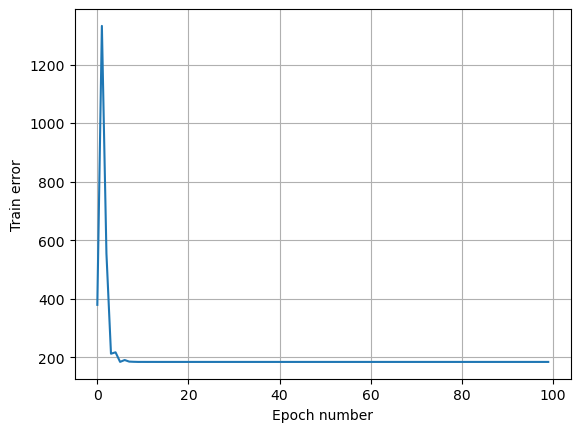

In [42]:
import pylab as pl
pl.plot(error1[0])
pl.xlabel('Epoch number')
pl.ylabel('Train error')
pl.grid()
pl.show()